In [1]:
import pandas as pd 

In [10]:
# import data 
shops_df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv").set_index('order_id')

In [11]:
shops_df.head()

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
1,53,746,224,2,cash,2017-03-13 12:36:56
2,92,925,90,1,cash,2017-03-03 17:38:52
3,44,861,144,1,cash,2017-03-14 4:23:56
4,18,935,156,1,credit_card,2017-03-26 12:43:37
5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [12]:
shops_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   shop_id         5000 non-null   int64 
 1   user_id         5000 non-null   int64 
 2   order_amount    5000 non-null   int64 
 3   total_items     5000 non-null   int64 
 4   payment_method  5000 non-null   object
 5   created_at      5000 non-null   object
dtypes: int64(4), object(2)
memory usage: 273.4+ KB


In [13]:
shops_df.describe()

,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.00000
mean,50.078800,849.092400,3145.128000,8.78720
std,29.006118,87.798982,41282.539349,116.32032
min,1.000000,607.000000,90.000000,1.00000
25%,24.000000,775.000000,163.000000,1.00000
50%,50.000000,849.000000,284.000000,2.00000
75%,75.000000,925.000000,390.000000,3.00000
max,100.000000,999.000000,704000.000000,2000.00000


The problems statement states that the average order value (AOV) is calculated to be 3145.13, this aligns with the total mean value of the 'order_amount', so there is no calculation error. 
- take a look at the shop and orders for repeated orders 
    - Each order is unique (as shops_df.describe() shows)
- make sure the dates are within 30 days 
- look into the actual order_amount, make sure it is measuring monetary value as expected
    - There is an outlier  

In [16]:
pd.to_datetime(shops_df.created_at.max()) -  pd.to_datetime(shops_df.created_at.min()) # it is correct

Timedelta('29 days 09:46:51')

<AxesSubplot:ylabel='Frequency'>

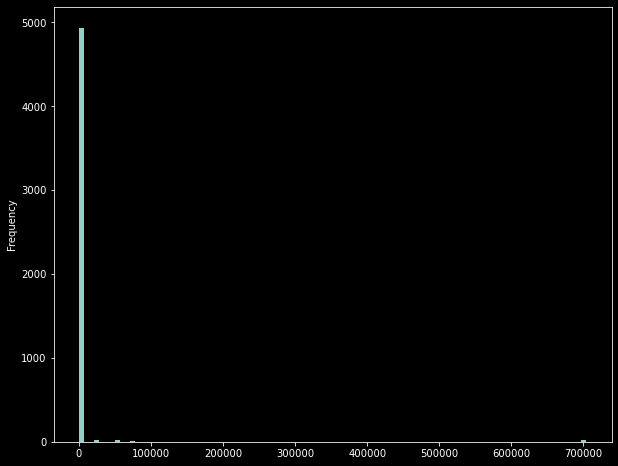

In [58]:
# there are some outliers
shops_df.order_amount.plot.hist(bins=100, figsize=(10, 8))

In [45]:
# zoom in for a better view 
shops_df['order_amount'].max()

704000

In [47]:
sum(shops_df['order_amount'] ==704000)

17

In [50]:
shops_df[shops_df['order_amount'] ==704000].value_counts()

shop_id  user_id  order_amount  total_items  payment_method  created_at        
42       607      704000        2000         credit_card     2017-03-28 4:00:00    3
                                                             2017-03-02 4:00:00    2
                                                             2017-03-07 4:00:00    2
                                                             2017-03-24 4:00:00    2
                                                             2017-03-04 4:00:00    1
                                                             2017-03-11 4:00:00    1
                                                             2017-03-12 4:00:00    1
                                                             2017-03-15 4:00:00    1
                                                             2017-03-17 4:00:00    1
                                                             2017-03-19 4:00:00    1
                                                             2017-03-2

There is a total of 17 extreme outlier with 704000 order amount from the single user 607 at the shop 42. 

This is still a valid entry, but this mean doesn't suit the analysis of central tendency for this specific dataset. One simple solution is to evaluate the median of the order amount which should capture more order values.

The median amount: 284.0


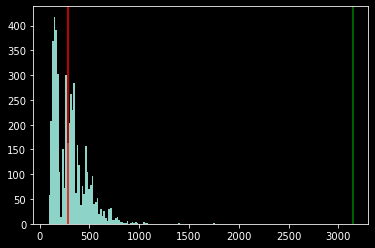

In [62]:
# use a histogram plot to demonstrate 
import matplotlib.pyplot as plt 

print(f"The median amount: {shops_df.order_amount.median()}")

plt.hist(shops_df.order_amount[shops_df.order_amount < 20000], bins=100)
plt.axvline(x=shops_df.order_amount.mean(), color='green')
plt.axvline(x=shops_df.order_amount.median(), color='red')

The position of the red line (median) capture way more central tendency than the green line (mean)
- another approach is to use truncate the data by frequency threshold, and report the mean again

New mean: 260.4956976029502, new median: 260.0


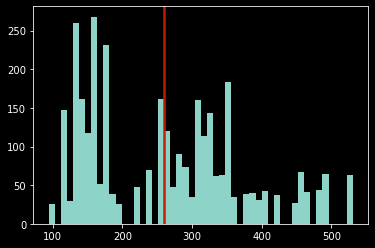

In [110]:

min_threshold = 0.005*shops_df.shape[0]
filtered_values = (shops_df['order_amount'].value_counts()[shops_df['order_amount'].value_counts() >= min_threshold]).index.to_numpy()
filtered_df = shops_df[shops_df['order_amount'].isin(filtered_values)]

print(f"New mean: {filtered_df.order_amount.mean()}, new median: {filtered_df.order_amount.median()}")
plt.hist(filtered_df.order_amount, bins=50)
plt.axvline(x=filtered_df.order_amount.mean(), color='green')
plt.axvline(x=filtered_df.order_amount.median(), color='red')

2rd approach is to use logarithm normalization to truncate the dataset
- this approach should create less skew, while still maintain much of the original distribution. 

New mean: 5.652561018830285, new median: 5.648974238161206


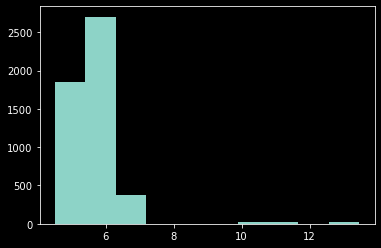

In [127]:
import numpy as np 

logged =np.log(shops_df.order_amount)
plt.hist(logged)
print(f"New mean: {np.mean(logged)}, new median: {np.median(logged )}")
# plt.axvline(x=np.mean(logged), color='green')
# plt.axvline(x=np.median((logged)), color='red')

New mean: 302.58051448247926, new median: 284.00000000000006


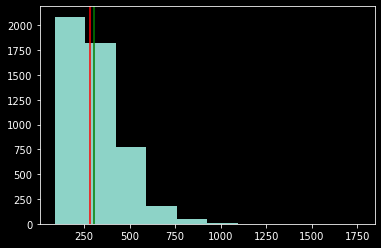

In [118]:
# some truncate
import numpy as np 

logged =np.log(shops_df.order_amount)
plt.hist(np.exp(logged[logged <10]))
print(f"New mean: {np.mean(np.exp(logged[logged <10]))}, new median: {np.median(np.exp(logged[logged <10]))}")
plt.axvline(x=np.mean(np.exp(logged[logged <10])), color='green')
plt.axvline(x=np.median(np.exp(logged[logged <10])), color='red')

The new dataframe removed order amounts entries that have less tha 0.5% of total occurrence, and now the mean and median converges. 
- This might be a problem, because we are leaving out special data points that can help us make great inference here. 

### Overall Solution: 
1. Mean is not a great measurement for this dataset because there are outliers in play. Looking at the median and log normalization 
2. I would use the log normalized (truncated) version of the median; because it provides a better overall description of the data, without losing too much of the original characteristic. 
3. The value of the log normalized (truncated) version of the median is 302.58.